In [3]:
import gzip
import os
import numpy as np

rows = 20000

train_data = os.path.join("..", "data", "mnist", "train-images-idx3-ubyte.gz")
train_labels = os.path.join("..", "data", "mnist", "train-labels-idx1-ubyte.gz")

test_data = os.path.join("..", "data", "mnist", "t10k-images-idx3-ubyte.gz")
test_labels = os.path.join("..", "data", "mnist", "t10k-labels-idx1-ubyte.gz")

In [5]:
def mnist_images(filename):
    with gzip.open(filename, "rb") as file:
        data = np.frombuffer(file.read(), np.uint8, offset = 16)
        return data.reshape(-1, 28, 28) / 255
    
def mnist_labels(filename):
    with gzip.open(filename, "rb") as file:
        return np.frombuffer(file.read(), np.uint8, offset = 8)

X_train = mnist_images(train_data)[:rows]
y_train = mnist_labels(train_labels)[:rows]

X_test = mnist_images(test_data)[:rows]
y_test = mnist_labels(test_labels)[:rows]

print(X_train.shape)

(20000, 28, 28)


4


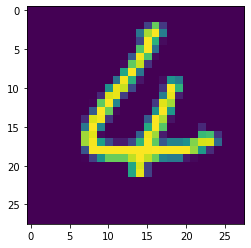

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_train[850])
plt.imshow(X_train[850])
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
scaler.fit(X_train.reshape(-1, 784))

X_train = scaler.transform(X_train.reshape(-1, 784))
X_test = scaler.transform(X_test.reshape(-1, 784))


In [8]:
model = SVC(kernel = "linear", C = 10)
model.fit(X_train, y_train)
model.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
model.score(X_test.reshape(-1, 784), y_test)

0.9159